## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap PING scan (sneaky)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_ping_scan_sneaky'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

2197    16484.140838
Name: time, dtype: float64

In [4]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    16484.140838
1    16484.216552
2    16484.233842
3    16484.352666
4    16484.120430
5    16484.199754
6    16484.005818
7    16484.182681
8    16484.325729
9    16484.301033
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp.mean()

0    16484.207934
dtype: float64

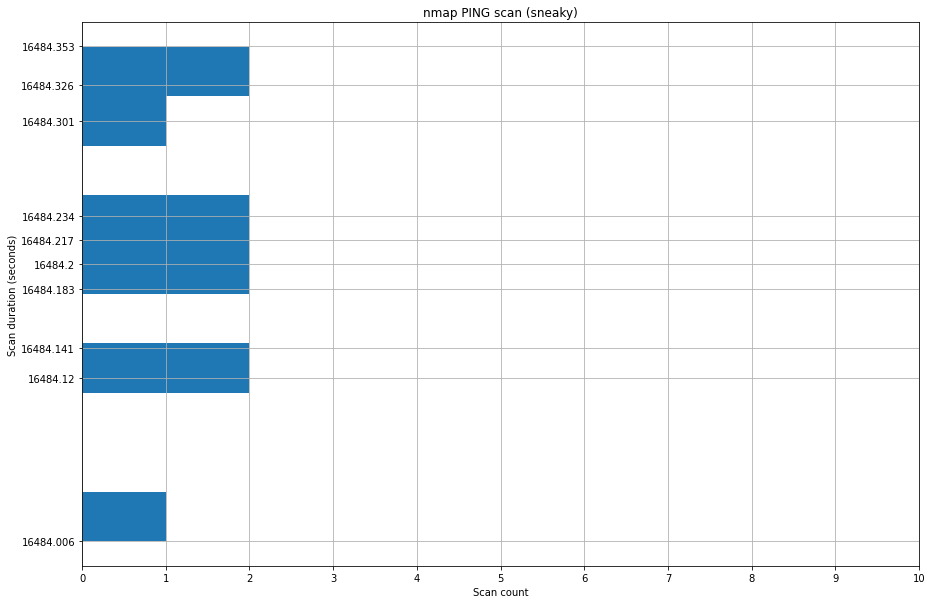

In [8]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [9]:
temp.describe()

,0
count,10.000000
mean,16484.207934
std,0.104323
min,16484.005818
25%,16484.151299
50%,16484.208153
75%,16484.284235
max,16484.352666


## Packet count

In [10]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [11]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 21980
Overall sent packets to scanner: 10990
Overall received packets from scanner: 10990


## Packets pr. second

In [12]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1.3333973999615427



## Order of ports scanned


In [13]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 36338 113
2 36338 21
3 36338 8080
4 36338 143
5 36338 993
6 36338 25
7 36338 5900
8 36338 8888
9 36338 1025
10 36338 80
11 36343 21
12 36338 554
13 36338 3306
14 36338 22
15 36338 1720
16 36338 53
17 36338 256
18 36338 587
19 36338 995
20 36338 135
21 36338 443
22 36345 21
23 36338 111
24 36338 199
25 36338 445
26 36338 110
27 36338 23
28 36338 139
29 36338 3389
30 36338 1723
31 36338 3
32 36338 1998
33 36347 21
34 36338 9929
35 36338 4444
36 36338 6007
37 36338 2009
38 36338 5431
39 36338 1082
40 36338 27356
41 36338 20005
42 36338 465
43 36338 49160
44 36349 21
45 36338 6003
46 36338 1046
47 36338 999
48 36338 6547
49 36338 1839
50 36338 9944
51 36338 1048
52 36338 2099
53 36338 9917
54 36338 4998
55 36351 21
56 36338 8652
57 36338 5678
58 36338 7002
59 36338 31337
60 36338 3261
61 36338 1119
62 36338 4443
63 36338 1029
64 36338 2500
65 36338 7778
66 36353 21
67 36338 9503
68 36338 2557
69 36338 8008
70 36338 990
71 36338 32781
72 36338 3766
73 36338 8084
74 36338 13
75 36338 85
76

575 36338 3001
576 36338 1521
577 36338 16080
578 36338 787
579 36338 1030
580 36338 3030
581 36338 8292
582 36338 3372
583 36447 21
584 36338 26214
585 36338 8222
586 36338 5915
587 36338 1032
588 36338 280
589 36338 65129
590 36338 1234
591 36338 6580
592 36338 1022
593 36338 1301
594 36449 21
595 36338 1035
596 36338 9900
597 36338 125
598 36338 1533
599 36338 2910
600 36338 6666
601 36338 4567
602 36338 1126
603 36338 2068
604 36338 2301
605 36451 21
606 36338 2638
607 36338 12265
608 36338 3880
609 36338 1108
610 36338 1111
611 36338 1248
612 36338 2800
613 36338 389
614 36338 497
615 36338 32779
616 36453 21
617 36338 9943
618 36338 7103
619 36338 1165
620 36338 32780
621 36338 49152
622 36338 8083
623 36338 5080
624 36338 8099
625 36338 5050
626 36338 37
627 36455 21
628 36338 45100
629 36338 14000
630 36338 1199
631 36338 3517
632 36338 49153
633 36338 65000
634 36338 3268
635 36338 7106
636 36338 3918
637 36338 3260
638 36457 21
639 36338 58080
640 36338 38292
641 36338 5357
6

25 33549 554
26 33549 199
27 33549 21
28 33549 995
29 33549 8080
30 33549 1025
31 33549 5001
32 33549 2100
33 33558 8888
34 33549 1201
35 33549 8099
36 33549 3404
37 33549 1149
38 33549 5718
39 33549 54045
40 33549 1175
41 33549 2968
42 33549 749
43 33549 5989
44 33560 8888
45 33549 1126
46 33549 3071
47 33549 8180
48 33549 30718
49 33549 1007
50 33549 1026
51 33549 7920
52 33549 1075
53 33549 6580
54 33549 4125
55 33562 8888
56 33549 33354
57 33549 1131
58 33549 35500
59 33549 1218
60 33549 3814
61 33549 1594
62 33549 10024
63 33549 5952
64 33549 524
65 33549 6106
66 33564 8888
67 33549 5988
68 33549 5440
69 33549 888
70 33549 83
71 33549 10617
72 33549 1058
73 33549 513
74 33549 5500
75 33549 1031
76 33549 4567
77 33566 8888
78 33549 8443
79 33549 1812
80 33549 3013
81 33549 6779
82 33549 50000
83 33549 10009
84 33549 119
85 33549 6002
86 33549 3659
87 33549 7025
88 33568 8888
89 33549 32780
90 33549 2144
91 33549 1059
92 33549 1199
93 33549 1666
94 33549 32768
95 33549 1034
96 33549

1025 33549 13456
1026 33549 5033
1027 33549 1043
1028 33549 903
1029 33549 7938
1030 33549 8873
1031 33549 3168
1032 33549 79
1033 33549 2013
1034 33740 8888
1035 33549 2033
1036 33549 1061
1037 33549 1021
1038 33549 2725
1039 33549 44176
1040 33549 1217
1041 33549 1065
1042 33549 1053
1043 33549 8008
1044 33549 2301
1045 33742 8888
1046 33549 1719
1047 33549 3827
1048 33549 1755
1049 33549 3851
1050 33549 9917
1051 33549 5960
1052 33549 5357
1053 33549 3828
1054 33549 3001
1055 33549 4446
1056 33744 8888
1057 33549 3323
1058 33549 1984
1059 33549 8292
1060 33549 9594
1061 33549 765
1062 33549 82
1063 33549 3869
1064 33549 7496
1065 33549 6003
1066 33549 27356
1067 33746 8888
1068 33549 1583
1069 33549 4242
1070 33549 49156
1071 33549 1066
1072 33549 9998
1073 33549 5061
1074 33549 1130
1075 33549 1076
1076 33549 7402
1077 33549 3546
1078 33748 8888
1079 33549 3006
1080 33549 3918
1081 33549 90
1082 33549 5009
1083 33549 50300
1084 33549 7106
1085 33549 6881
1086 33549 49400
1087 33549

558 58692 30951
559 58692 3986
560 58692 2034
561 58797 21
562 58692 1185
563 58692 6566
564 58692 3325
565 58692 2191
566 58692 4444
567 58692 5801
568 58692 992
569 58692 3809
570 58692 1082
571 58692 777
572 58799 21
573 58692 4443
574 58692 5959
575 58692 26
576 58692 9878
577 58692 2608
578 58692 1687
579 58692 17877
580 58692 1148
581 58692 8654
582 58692 43
583 58801 21
584 58692 7676
585 58692 9999
586 58692 16012
587 58692 8193
588 58692 33899
589 58692 1034
590 58692 1500
591 58692 1038
592 58692 5907
593 58692 1247
594 58803 21
595 58692 2717
596 58692 5850
597 58692 2701
598 58692 4848
599 58692 6001
600 58692 5925
601 58692 7001
602 58692 1059
603 58692 90
604 58692 3869
605 58805 21
606 58692 2010
607 58692 9200
608 58692 2038
609 58692 2103
610 58692 6009
611 58692 4899
612 58692 2000
613 58692 9485
614 58692 555
615 58692 5405
616 58807 21
617 58692 8090
618 58692 1023
619 58692 1186
620 58692 52673
621 58692 8085
622 58692 1098
623 58692 1073
624 58692 26214
625 58692 

121 51875 3306
122 51850 9002
123 51850 2021
124 51850 6779
125 51850 1049
126 51850 1721
127 51850 8800
128 51850 1123
129 51850 7443
130 51850 83
131 51850 999
132 51877 3306
133 51850 41511
134 51850 1185
135 51850 49154
136 51850 5911
137 51850 2160
138 51850 62078
139 51850 55055
140 51850 20
141 51850 873
142 51850 6059
143 51879 3306
144 51850 513
145 51850 458
146 51850 32771
147 51850 6692
148 51850 5225
149 51850 9415
150 51850 27355
151 51850 1124
152 51850 10778
153 51850 2008
154 51881 3306
155 51850 1301
156 51850 6566
157 51850 2702
158 51850 1719
159 51850 3128
160 51850 27356
161 51850 2034
162 51850 8500
163 51850 5666
164 51850 5810
165 51883 3306
166 51850 3007
167 51850 3827
168 51850 1443
169 51850 4321
170 51850 54328
171 51850 1145
172 51850 9200
173 51850 544
174 51850 1666
175 51850 2035
176 51885 3306
177 51850 5901
178 51850 32777
179 51850 1248
180 51850 100
181 51850 2725
182 51850 1812
183 51850 3372
184 51850 9090
185 51850 48080
186 51850 667
187 51887 

181 61120 1074
182 61120 787
183 61120 4045
184 61120 7627
185 61120 2006
186 61120 5101
187 61157 995
188 61120 9594
189 61120 2013
190 61120 20221
191 61120 50636
192 61120 8021
193 61120 801
194 61120 1011
195 61120 5080
196 61120 900
197 61120 8254
198 61159 995
199 61120 55600
200 61120 3828
201 61120 1098
202 61120 514
203 61120 2725
204 61120 306
205 61120 8087
206 61120 1022
207 61120 3011
208 61120 2034
209 61161 995
210 61120 1033
211 61120 2042
212 61120 2065
213 61120 45100
214 61120 2170
215 61120 32779
216 61120 1091
217 61120 2105
218 61120 1233
219 61120 5432
220 61163 995
221 61120 1145
222 61120 5051
223 61120 33354
224 61120 6788
225 61120 10002
226 61120 1068
227 61120 1524
228 61120 1131
229 61120 1039
230 61120 9535
231 61165 995
232 61120 8088
233 61120 65389
234 61120 6101
235 61120 700
236 61120 6129
237 61120 5440
238 61120 10082
239 61120 12265
240 61120 8290
241 61120 1061
242 61167 995
243 61120 5190
244 61120 497
245 61120 6668
246 61120 7004
247 61120 336

294 63832 31038
295 63832 1087
296 63832 8089
297 63889 80
298 63832 16001
299 63832 83
300 63832 1971
301 63832 5862
302 63832 16016
303 63832 50389
304 63832 16080
305 63832 648
306 63832 22939
307 63832 15002
308 63891 80
309 63832 12174
310 63832 2196
311 63832 3031
312 63832 1864
313 63832 7741
314 63832 3476
315 63832 1052
316 63832 18101
317 63832 50000
318 63832 12345
319 63893 80
320 63832 3260
321 63832 1198
322 63832 3030
323 63832 4848
324 63832 44501
325 63832 5631
326 63832 6007
327 63832 5989
328 63832 9081
329 63832 5800
330 63895 80
331 63832 5907
332 63832 5222
333 63832 6565
334 63832 9001
335 63832 5922
336 63832 1063
337 63832 1090
338 63832 17
339 63832 8093
340 63832 306
341 63897 80
342 63832 49
343 63832 49154
344 63832 49156
345 63832 3372
346 63832 5903
347 63832 15660
348 63832 2010
349 63832 8022
350 63832 1175
351 63832 1011
352 63899 80
353 63832 2043
354 63832 2875
355 63832 9929
356 63832 2003
357 63832 3889
358 63832 7004
359 63832 512
360 63832 27355


951 63832 9110
952 63832 1057
953 63832 17877
954 63832 1108
955 63832 65389
956 63832 65129
957 64009 80
958 63832 1029
959 63832 5998
960 63832 1080
961 63832 6692
962 63832 32784
963 63832 49165
964 63832 6100
965 63832 4129
966 63832 1287
967 63832 1095
968 64011 80
969 63832 10629
970 63832 1236
971 63832 9917
972 63832 32779
973 63832 14000
974 63832 6543
975 63832 6901
976 63832 2401
977 63832 301
978 63832 40193
979 64013 80
980 63832 1271
981 63832 1183
982 63832 10082
983 63832 3323
984 63832 32
985 63832 8290
986 63832 26214
987 63832 32772
988 63832 12000
989 63832 9502
990 64015 80
991 63832 1105
992 63832 8082
993 63832 2045
994 63832 51103
995 63832 3283
996 63832 4001
997 63832 1164
998 63832 1067
999 63832 14238
1000 63832 2702
1001 64017 80
1002 63832 6667
1003 63832 8087
1004 63832 6009
1005 63832 1131
1006 63832 31337
1007 63832 5555
1008 63832 5298
1009 63832 13722
1010 63832 1046
1011 63832 5033
1012 64019 80
1013 63832 3011
1014 63832 49159
1015 63832 34571
1016 

515 40500 10626
516 40500 366
517 40597 53
518 40500 1455
519 40500 1110
520 40500 32773
521 40500 54328
522 40500 7001
523 40500 8181
524 40500 9485
525 40500 8193
526 40500 1296
527 40500 10629
528 40599 53
529 40500 3211
530 40500 2190
531 40500 7938
532 40500 43
533 40500 3333
534 40500 6059
535 40500 3301
536 40500 8011
537 40500 84
538 40500 4242
539 40601 53
540 40500 7106
541 40500 7019
542 40500 1032
543 40500 6567
544 40500 1051
545 40500 8042
546 40500 6129
547 40500 49175
548 40500 1123
549 40500 24800
550 40603 53
551 40500 683
552 40500 1044
553 40500 8333
554 40500 50636
555 40500 1755
556 40500 27356
557 40500 2968
558 40500 49
559 40500 6839
560 40500 1073
561 40605 53
562 40500 81
563 40500 4998
564 40500 801
565 40500 1840
566 40500 2998
567 40500 2366
568 40500 5004
569 40500 5959
570 40500 3369
571 40500 1064
572 40607 53
573 40500 2100
574 40500 2301
575 40500 4444
576 40500 3690
577 40500 3689
578 40500 32769
579 40500 1112
580 40500 3527
581 40500 6668
582 40500

525 45081 44176
526 45081 2260
527 45081 999
528 45180 8080
529 45081 5500
530 45081 212
531 45081 2196
532 45081 41511
533 45081 19842
534 45081 2910
535 45081 3690
536 45081 726
537 45081 3814
538 45081 14442
539 45182 8080
540 45081 40911
541 45081 5405
542 45081 2251
543 45081 8001
544 45081 1062
545 45081 8654
546 45081 4111
547 45081 783
548 45081 987
549 45081 10010
550 45184 8080
551 45081 5801
552 45081 50003
553 45081 6059
554 45081 9080
555 45081 2040
556 45081 1095
557 45081 5102
558 45081 8193
559 45081 8899
560 45081 1271
561 45186 8080
562 45081 1123
563 45081 1077
564 45081 5963
565 45081 1169
566 45081 3351
567 45081 1494
568 45081 2500
569 45081 56737
570 45081 16018
571 45081 15742
572 45188 8080
573 45081 1218
574 45081 19350
575 45081 5815
576 45081 52869
577 45081 301
578 45081 57797
579 45081 5810
580 45081 2126
581 45081 119
582 45081 3889
583 45190 8080
584 45081 366
585 45081 340
586 45081 7512
587 45081 1296
588 45081 37
589 45081 1063
590 45081 20222
591 450

1095 45081 33899
1096 45081 1100
1097 45081 1175
1098 45081 19
1099 45081 49175
1 50669 443
2 50669 143
3 50669 587
4 50669 110
5 50669 995
6 50669 1025
7 50669 256
8 50669 111
9 50669 3389
10 50669 80
11 50674 443
12 50669 25
13 50669 199
14 50669 53
15 50669 3306
16 50669 21
17 50669 23
18 50669 135
19 50669 445
20 50669 993
21 50669 22
22 50676 443
23 50669 139
24 50669 1720
25 50669 1723
26 50669 8080
27 50669 8888
28 50669 5900
29 50669 113
30 50669 554
31 50669 34572
32 50669 8402
33 50678 443
34 50669 5730
35 50669 9002
36 50669 9010
37 50669 2222
38 50669 3369
39 50669 5902
40 50669 264
41 50669 5226
42 50669 7019
43 50669 9594
44 50680 443
45 50669 1048
46 50669 2038
47 50669 1126
48 50669 1947
49 50669 30951
50 50669 1021
51 50669 24444
52 50669 5961
53 50669 3827
54 50669 20828
55 50682 443
56 50669 9503
57 50669 54045
58 50669 35500
59 50669 9876
60 50669 1090
61 50669 4126
62 50669 6100
63 50669 54328
64 50669 50500
65 50669 6389
66 50684 443
67 50669 1081
68 50669 3372
69

63 39751 2040
64 39751 1064
65 39751 722
66 39766 1720
67 39751 5560
68 39751 3689
69 39751 7402
70 39751 5911
71 39751 1080
72 39751 808
73 39751 5859
74 39751 1244
75 39751 5033
76 39751 1840
77 39768 1720
78 39751 3077
79 39751 3784
80 39751 711
81 39751 5962
82 39751 50800
83 39751 9071
84 39751 8500
85 39751 1011
86 39751 7
87 39751 2020
88 39770 1720
89 39751 2170
90 39751 1174
91 39751 49152
92 39751 33354
93 39751 3703
94 39751 8443
95 39751 1059
96 39751 18988
97 39751 5666
98 39751 1165
99 39772 1720
100 39751 8042
101 39751 1352
102 39751 544
103 39751 34573
104 39751 11110
105 39751 2161
106 39751 106
107 39751 2875
108 39751 90
109 39751 3030
110 39774 1720
111 39751 15742
112 39751 49175
113 39751 4443
114 39751 52673
115 39751 2126
116 39751 2004
117 39751 3971
118 39751 3889
119 39751 3827
120 39751 1029
121 39776 1720
122 39751 6580
123 39751 8002
124 39751 1096
125 39751 10243
126 39751 1718
127 39751 6510
128 39751 3851
129 39751 5550
130 39751 1972
131 39751 1052
13

730 39751 1040
731 39751 49160
732 39751 407
733 39751 32783
734 39751 1030
735 39751 7937
736 39751 10012
737 39888 1720
738 39751 1051
739 39751 2049
740 39751 8400
741 39751 49
742 39751 1277
743 39751 1198
744 39751 8291
745 39751 5120
746 39751 4550
747 39751 2260
748 39890 1720
749 39751 2103
750 39751 5910
751 39751 49153
752 39751 1494
753 39751 1296
754 39751 3945
755 39751 631
756 39751 4
757 39751 1761
758 39751 42
759 39892 1720
760 39751 61532
761 39751 1641
762 39751 9898
763 39751 55600
764 39751 1105
765 39751 6901
766 39751 5718
767 39751 4445
768 39751 7002
769 39751 27000
770 39894 1720
771 39751 7000
772 39751 1259
773 39751 57797
774 39751 26
775 39751 1009
776 39751 6025
777 39751 3007
778 39751 1036
779 39751 5989
780 39751 5298
781 39896 1720
782 39751 8008
783 39751 5987
784 39751 40911
785 39751 51103
786 39751 2492
787 39751 6156
788 39751 1433
789 39751 800
790 39751 1068
791 39751 5102
792 39898 1720
793 39751 8001
794 39751 1248
795 39751 9091
796 39751 12

In [14]:
orders_port

,scannr,sport,dport
0,1,36338,113
1,2,36338,21
2,3,36338,8080
3,4,36338,143
4,5,36338,993
...,...,...,...
10985,1095,39751,4449
10986,1096,39751,61900
10987,1097,39751,34572
10988,1098,39751,1152


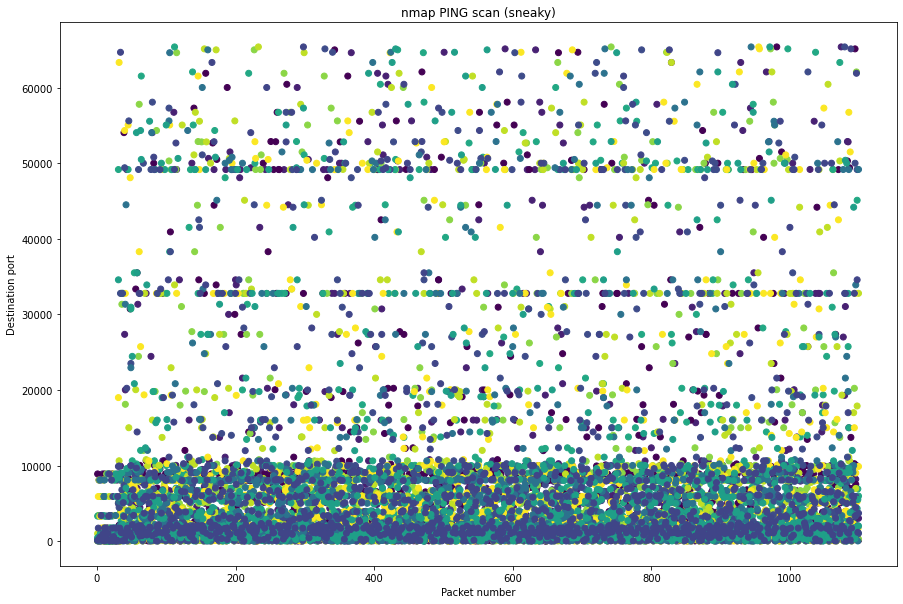

In [15]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [16]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [17]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

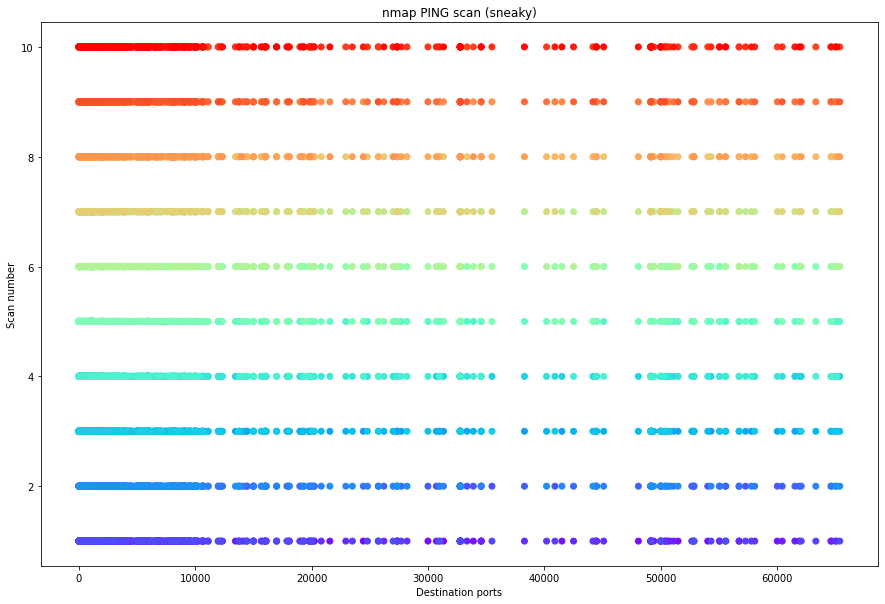

In [18]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [19]:
payloads.value_counts()

0.0    10990
dtype: int64

## IP-ID

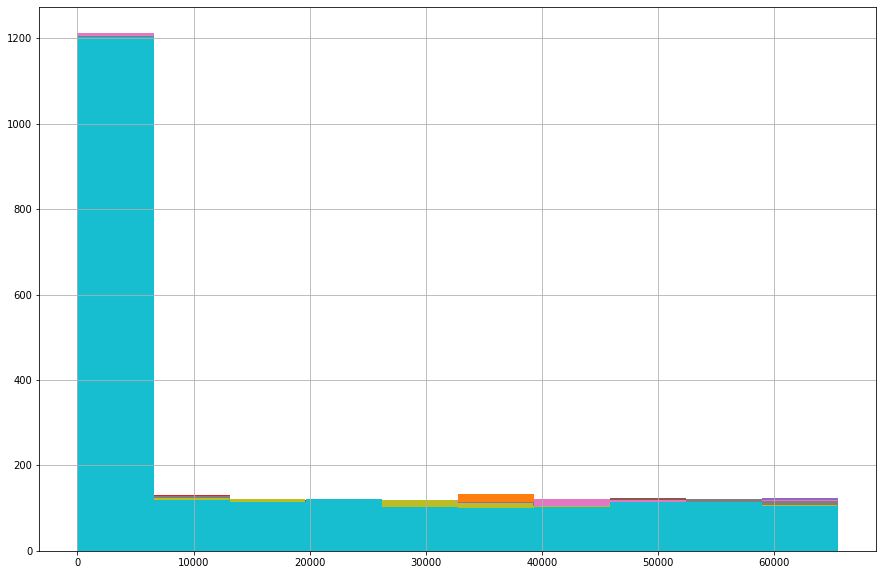

In [20]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

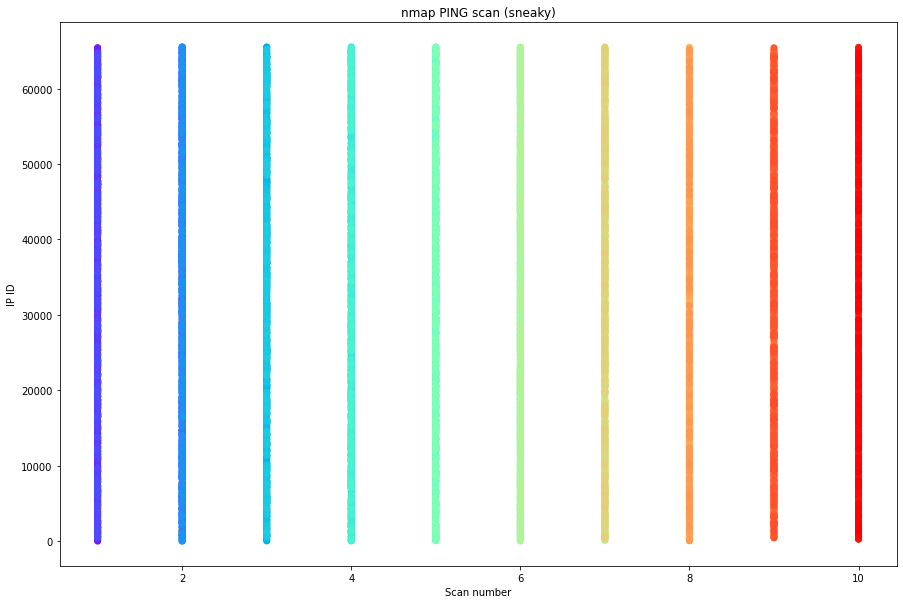

In [21]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


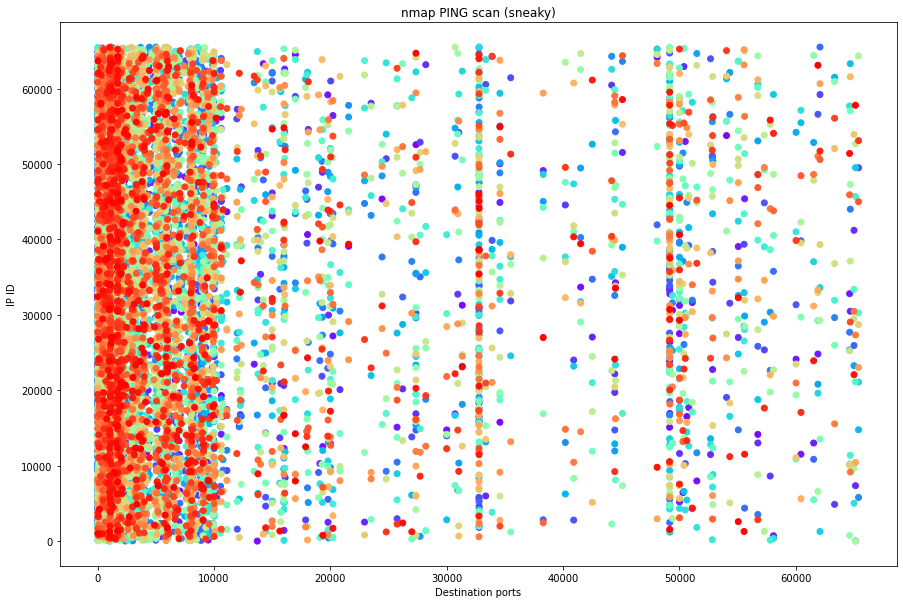

In [22]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids

    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

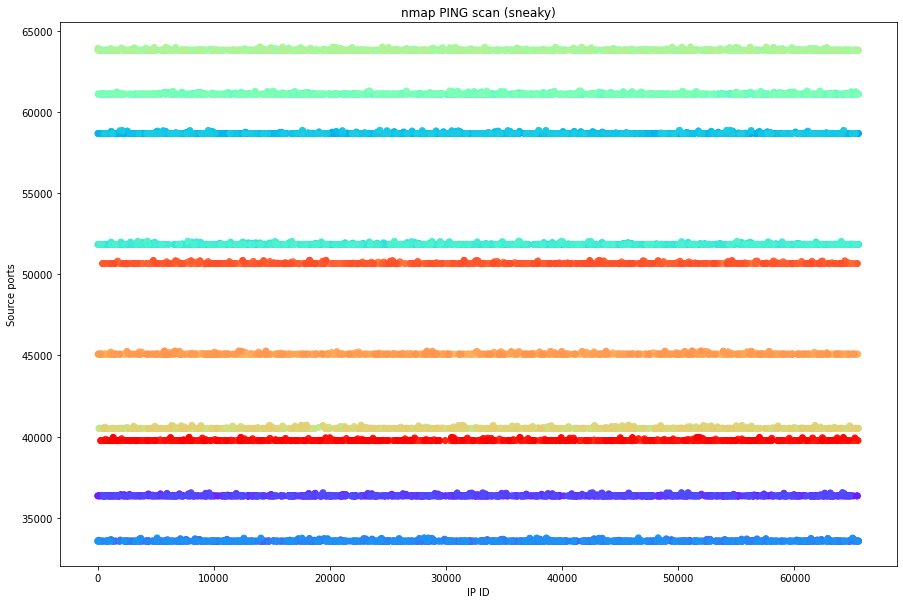

In [23]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

## TCP Window size

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
-----
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Wind

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 362094860
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 362225934
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 362356992
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
S

Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 352526746
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 352657820
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 352788894
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
Sequence number: 361767177
S

Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3016306859
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3016700077
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3016569007
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 3013750976
Sequence number: 301

Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3285596165
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3285202947
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3285334017
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 328

Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3272358111
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
Sequence number: 3284482070
-----
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2876793246
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence numbe

Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2871026118
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2871157188
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 2870764026
Sequence number: 2877120923
Sequence number: 2877120923
Sequence number: 287

Sequence number: 669247092
Sequence number: 665511485
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 665380415
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 665773625
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 665642555
Sequence number: 669247092
Sequence number: 669247092
S

Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 658958033
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 658826963
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 659220189
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
Sequence number: 669247092
S

Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1386267235
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1386660453
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1386529383
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 1379123952
Sequence number: 137

Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4116148873
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4116017803
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4116411013
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 4117918380
Sequence number: 411

Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1279603378
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1279472308
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1279341238
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 128

Sequence number: 1280717473
Sequence number: 1278948044
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1278816974
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1277637328
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1280717473
Sequence number: 1277506258
Sequence number: 128

Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 971033471
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 971426681
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 971295611
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 970640197
S

Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 957139859
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 956484509
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 956353439
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
Sequence number: 968608548
S

Sequence number: 651245064
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 651638286
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 651507212
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 651900418
Sequence number: 645019307
Sequence number: 645019307
Sequence number: 645019307
S

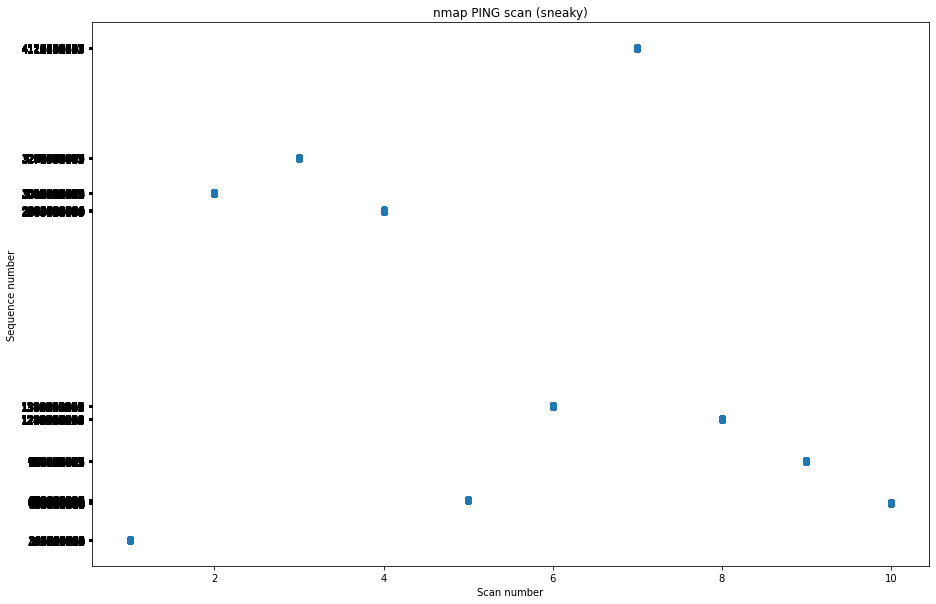

In [27]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
#plt.scatter(x, ys, color=colors)
#y_formatter = ScalarFormatter(useOffset=False)
#plt.gca().yaxis.set_major_formatter(y_formatter)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


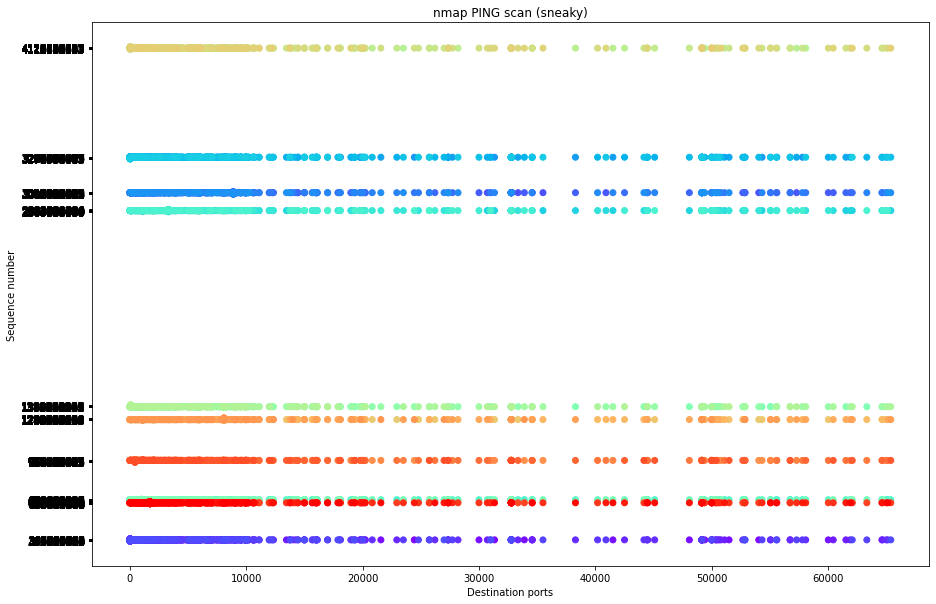

In [28]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

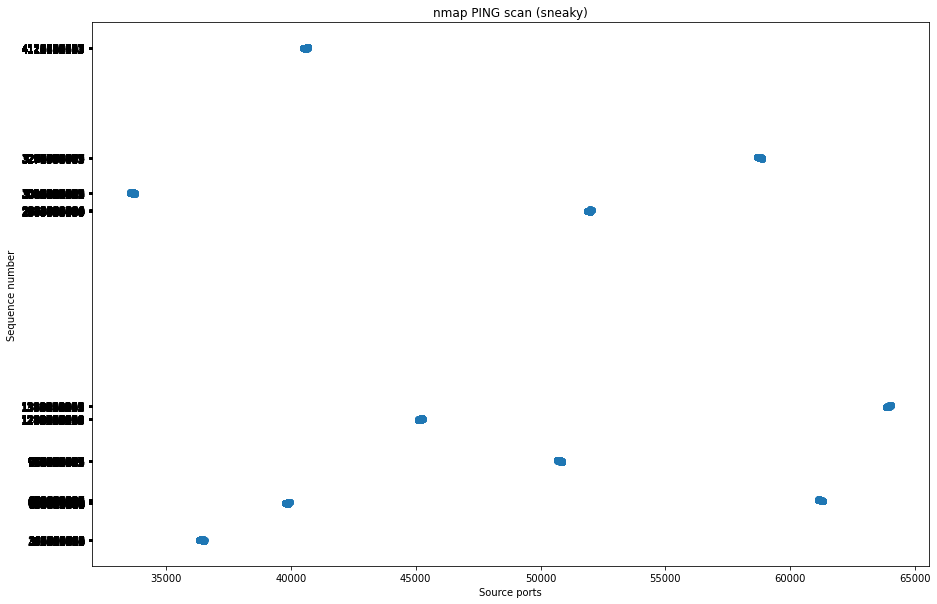

In [29]:
if src_ports:
    x = src_ports
    ys = sequences
    #colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [30]:
len(set(orders_port['sport']))

1000

In [31]:
orders_port['sport'].value_counts()[:30]

36338    1000
33549    1000
39751    1000
50669    1000
45081    1000
40500    1000
61120    1000
51850    1000
58692    1000
63832    1000
36361       1
40623       1
40627       1
40629       1
40631       1
40633       1
40635       1
40637       1
40639       1
40641       1
40643       1
40645       1
40647       1
40649       1
40651       1
40653       1
40655       1
40657       1
40659       1
40661       1
Name: sport, dtype: int64

## Flags

In [32]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
-----
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flag

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F